# Inaugural Project

In [12]:

# Importing
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import optimize
import warnings # To ignore runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Setting up the model 
from Household import HouseholdSpecializationModelClass
model=HouseholdSpecializationModelClass()
par=model.par
sol=model.sol

# Question 1

In [14]:
# Creating list of alpha and sigma values.
alpha_values =  [0.25, 0.5, 0.75]
sigma_values =  [0.5, 1.0, 1.5]

# Creating a solution matrix 
H_ratio = np.zeros((len(alpha_values), len(sigma_values)))

# Making loop which iterates over each combination of alpha_values and sigma_values and calculates the ratio between HF and HM
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        # Setting the parameters in the model to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma
        # Solving model
        opt = model.solve_discrete()
        H_ratio[i, j] = opt.HF/opt.HM

# Printing results
print(H_ratio)


[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


The rows and columns in the matrix are given by the indices i and j in the loop such that the first place in the matrix i.e.  H_ratio[0, 0] is the ratio obtained by the combination of alpha=0.25 and sigma=0.5, meanwhile the second place, H_ratio[0, 1] is thus for alpha=0.25 and sigma=1.0 etc...

**Illustration**

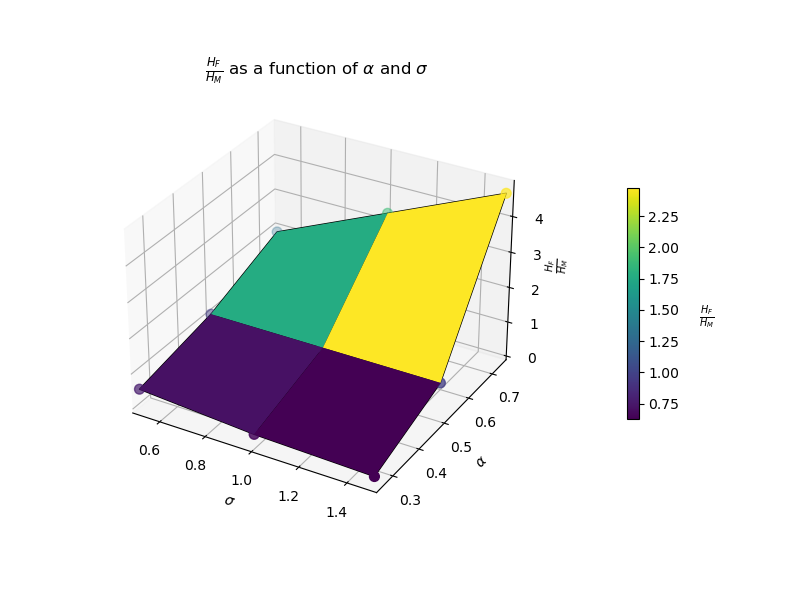

In [15]:
# To make plot interactive
%matplotlib widget 

# Creating 3d figures
fig = plt.figure(figsize=(8,6)) 
ax = plt.axes(projection='3d') 

# Creating plot
y = alpha_values
x = sigma_values
X, Y = np.meshgrid(x, y)
Z = H_ratio


# Plotting surface and adding colormap
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Adding points at each discrete combination of alpha and sigma values
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=Z.flatten(), cmap='viridis', s=50)

# Setting labels
ax.set_ylabel(r'$\alpha$') 
ax.set_xlabel(r'$\sigma$')
ax.set_zlabel(r'$\frac{H_{F}}{H_{M}}$')
ax.zaxis.labelpad=0.05

# Setting axis ranges to fit with alpha and sigma values
ax.set_ylim(0.25, 0.75)
ax.set_xlim(0.5, 1.5)

# Adding colorbar and adjusting it's position
cbar = plt.colorbar(ax.plot_surface(X, Y, Z, cmap='viridis'), shrink=0.5, pad=0.15)
cbar.ax.set_ylabel(r'$\frac{H_{F}}{H_{M}}$', rotation=360, labelpad=20)

# Adding title
ax.set_title(r'$\frac{H_{F}}{H_{M}}$ as a function of $\alpha$ and $\sigma$')

plt.show()






In the above plot we see that for a given sigma the ratio of household work between females and males is increasing in alpha. This due to alpha/(1-alpha) being the productivity in home production for females relative to men. When alpha goes from 0.25 to 0.75 with increments of 0.25, the female becomes more productive than the male and thereby increases the amount of hours spent on home production for a given sigma. When they are equally productive i.e. alpha=0.5, they do the same amount of housework. Sigma is the elasticity of substitution between home production for females and males. 
When females are less productive than males ie. alpha<0.5, HF/HM is descreasing in sigma since the it becomes easier to substitute between men and women in the home production and viceversa for when females are more productive than men. 

# Question 2

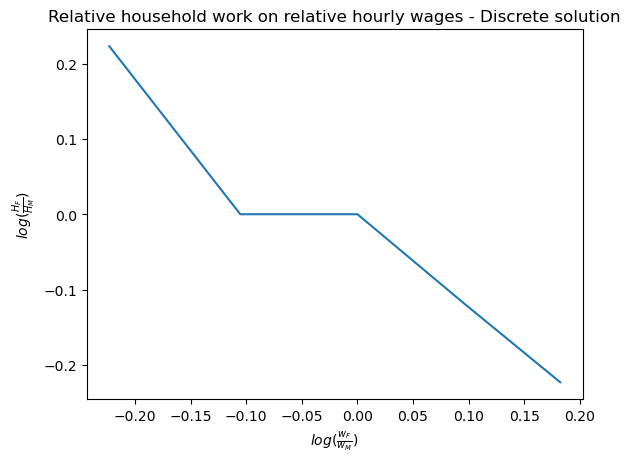

In [16]:
# Baseline model parameters
model.par.alpha=0.5
model.par.sigma=1

# Using discrete solver
model.solve_wF_vec(discrete=True)

# Creating arrays with necessary variables
log_wF_vec=np.log(model.par.wF_vec) # Since wM=1 we just take log of WF_vec
log_HFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)

# Creating 2d plot of log(HF/HM) against log(WF/WM)
%matplotlib inline
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(log_wF_vec,log_HFHM)
ax.set_xlabel(r'$log(\frac{w_{F}}{w_{M}})$') 
ax.set_ylabel(r'$log(\frac{H_{F}}{H_{M}})$')
ax.set_title(r'Relative household work on relative hourly wages - Discrete solution')
plt.show()


We see that there is a negative correlation between the relative amount of household work and the relative hourly wages between women and men. Due the to discrete nature of the solver, there is an interval in which the relative wage is negative while the relative amount of household work is 0. This can be explained by the choice set being discrete which makes removes the option of switching between household work and labor work instantly.

# Question 3

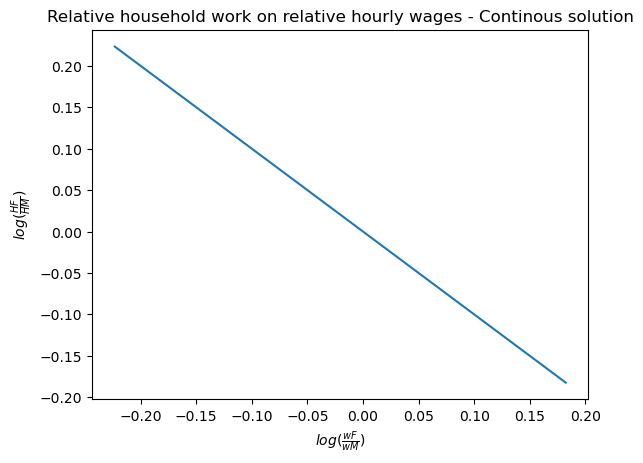

In [17]:
# Calling method that solves the model with continuos set of choices
model.solve_wF_vec()

# Creating arrays with necessary variables as before, but now from continous solution.
log_wF_vec=np.log(model.par.wF_vec)
log_HFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)

# Creating 2d plot of log(HF/HM) against log(WF/WM)
%matplotlib inline
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(log_wF_vec,log_HFHM)
ax.set_xlabel(r'$log(\frac{wF}{wM})$')
ax.set_ylabel(r'$log(\frac{HF}{HM})$')
ax.set_title(r'Relative household work on relative hourly wages - Continous solution')
plt.show()




The negative correlation between the relative hours of household work compared to the relative hourly wages between women and men is (of course) still negative. However, precisely when the female starts earning more than the man she also chooses to do less household work than the man. This is different compared to the discrete solution in which there was an interval in which the female did less household work than the man while still earning more than the man.


# Question 4

In [18]:
# Calling method that estimates alpha and sigma 
model.estimate()


# Finding deviation function value
x=[model.sol.alpha_estimate, model.sol.sigma_estimate]
model.objective_regression(x)

print("Alpha estimate:",model.sol.alpha_estimate,", Sigma estimate:", model.sol.sigma_estimate,"beto0 estimate:",model.sol.beta0,"beta1 estimate:",model.sol.beta1, "Deviation:",model.objective_regression(x))



Alpha estimate: 0.982039811134529 , Sigma estimate: 0.09996452252683685 beto0 estimate: 0.40000674043225004 beta1 estimate: -0.09996086639295965 Deviation: 1.5768726269063405e-09


*To illustrate how good the estimated model fits that data, we plot the two regression lines.*

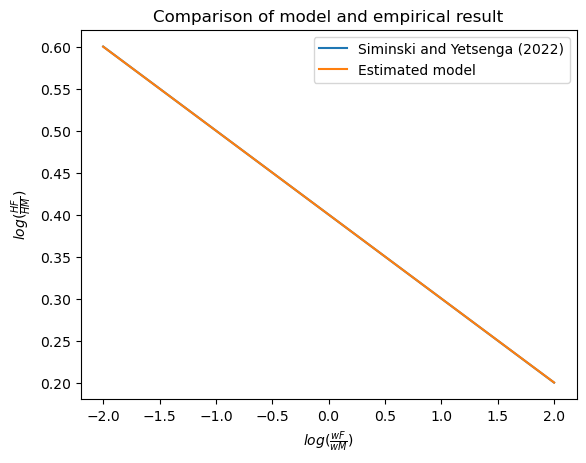

beto0: 0.40000674043225004 beta1: -0.09996086639295965


In [19]:

# Creating linspace for x-axis
x1 = np.linspace(-2, 2, 100)

# Regression from Siminski and Yetsenga (2022)
log_HFHM = 0.4 - 0.1*x1
logHFHM_est = model.sol.beta0 +model.sol.beta1*x1

# Plotting the two regressions and adding label and legend
plt.plot(x1, log_HFHM, label='Siminski and Yetsenga (2022)')
plt.plot(x1, logHFHM_est, label='Estimated model')
plt.xlabel(r'$log(\frac{wF}{wM})$')
plt.ylabel(r'$log(\frac{HF}{HM})$')
plt.title('Comparison of model and empirical result')
plt.legend()
plt.show()

print("beto0:",model.sol.beta0,"beta1:",model.sol.beta1)



Our estimated parameters alpha=0.98 sigma=0.099. This means that women are relatively more productive in the home than men and that men and women's work in the household are not that good substitutes.

Compared with Siminski and Yetsenga (2022) the estimated regression line is very close

# Question 5

In our extension to the model we let the males and females have different marginal disutilities of working, such that we now have:

$$
\begin{align*}
\max_{L_{W},L_{M},H_{W},H_{M}}&\frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_{M}^{1+\epsilon_M}}{1+\epsilon_M}+\frac{T_{W}^{1+\epsilon_W}}{1+\epsilon_W}\right) \\
\end{align*}
$$

In [20]:
# Setting up new model
model_1=HouseholdSpecializationModelClass()
sol=model_1.sol
par=model_1.par 

# Setting model extension in use 
par.gender=1

In [21]:
# Calling estimation
model_1.estimate()

# Finding deviation function value
x = [sol.sigma_estimate,sol.epsilon_w_estimate,sol.epsilon_m_estimate]
model_1.objective_regression(x)

print("New sigma estimate: ", sol.sigma_estimate, ", Womens epsilon (disutility of work): ",sol.epsilon_w_estimate,", Mens epsilon (disutility of work): ", sol.epsilon_m_estimate,", Deviation: ", model_1.objective_regression(x))



New sigma estimate:  0.09994770182315585 , Womens epsilon (disutility of work):  1.1433717126542753 , Mens epsilon (disutility of work):  1.4839345076741273 , Deviation:  0.1599980493944476


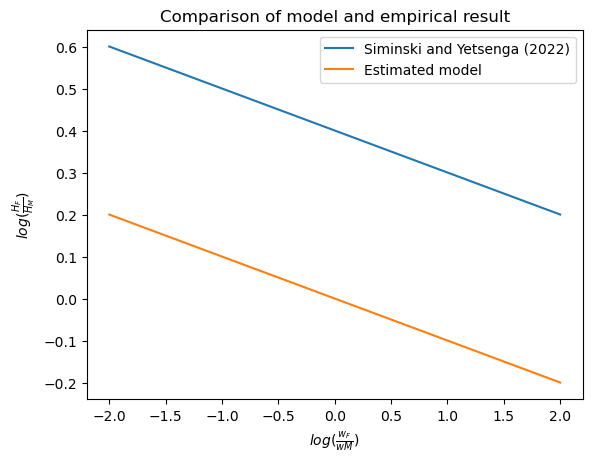

In [22]:
# Creating linspace for x-axis
x1 = np.linspace(-2, 2, 100)

# Regression from Siminski and Yetsenga (2022)
log_HFHM = 0.4 - 0.1*x1
logHFHM_est = sol.beta0 + sol.beta1*x1

# Plotting the two regressions and adding label and legend
plt.plot(x1, log_HFHM, label='Siminski and Yetsenga (2022)')
plt.plot(x1, logHFHM_est, label='Estimated model')
plt.xlabel(r'$log(\frac{w_{F}}{w{M}})$')
plt.ylabel(r'$log(\frac{H_{F}}{H_{M}})$')
plt.title('Comparison of model and empirical result')
plt.legend()
plt.show()


In our extension of the model in which we allowed men and women to have different marginal disutility of work, we estimated men to have a larger marginal disutilty of work. This resulted in matching the sign of beta1 to the data, however we also ended up with a worse fit to the data overall.